# Read Disco flow simulations outputs


In [1]:
import numpy as np
import vtk
import pyvista as pv
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import pickle

In [2]:
cm = 1/2.54

In [3]:
c_permanent = [46/255, 82/255, 102/255]
c_init_0    = [220/255, 196/255, 142/255]
#c_init_1    = [234/255, 239/255, 211/255]
c_init_1    = [179/255, 192/255, 164/255]
c_init_2   = [166/255, 127/255, 142/255]
c_init_3    = [102/255, 16/255, 31/255]


color_pall_3 = [c_permanent, c_init_0, c_init_1, c_init_2, c_init_3]

c_0 = [151, 157, 172]
c_1 = [92, 103, 125]
c_2 = [4, 102, 200]
c_3 = [2, 62, 125]
c_4 = [46, 82, 102]
c_5 = [0, 18, 51]

color_degr = [c_0, c_1, c_2, c_3, c_4, c_5]
color_degr = [[idc/255 for idc in col] for col in color_degr]


### Read output_simulations

In [4]:
def read_pickle(path):
    with open(path,'rb') as f:
        file = pickle.load(f)
    return file

In [5]:
columns_names = ['time_step', 'flow_rate', 'pos_x', 'pos_y', 'pipe_diam', 'seed']
colors = ['darkblue','darkred','darkorange']

In [6]:
pressure_list = [35,40,45,50]
out_list = []

for pressure in pressure_list:
    out = []
    for i in range(5):
        path = 'output_2021/out_{1}bar_2021/out_{0}/save_flow/output_simulations_{0}.pickle'.format(i,pressure)
        out.append(read_pickle(path))
        
    out = np.concatenate(out)
    out_list.append(out)

In [7]:
out_list[0].shape

(600, 6)

In [8]:
out_df = []
for out in out_list:
    data = {}
    data['time_step'] = [t[0] for t in out[:,2]]
    data['flow_rate'] = [t[1] for t in out[:,2]]
    data['pos_x']     = [t[0] for t in out[:,3]]
    data['pos_y']     = [t[1] for t in out[:,3]]
    data['pipe_diam'] = [t[3] for t in out[:,3]]
    data['seed']      = [t for t in out[:,4]]
    data['case_nb']   = [t for t in out[:,5]]
    out_df.append(pd.DataFrame(data))

In [9]:
out_df[3].head(5)

,time_step,flow_rate,pos_x,pos_y,pipe_diam,seed,case_nb
0,1.0,0.698821,782.0,17.0,6.4778,200000008,1
1,1.0,1.212990,1092.0,157.0,4.7037,200000008,1
2,1.0,0.618831,482.0,42.0,1.6123,200000008,1
3,1.0,1.092563,1717.0,167.0,1.3616,200000008,1
4,1.0,0.165720,1482.0,57.0,0.9507,200000008,1


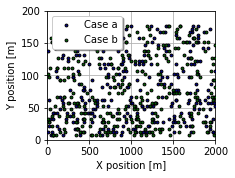

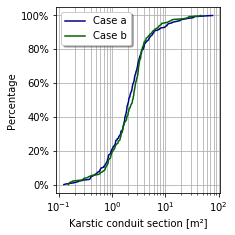

In [18]:
out_plot = out_df[0]

plt.figure(figsize=(8*cm,6*cm),constrained_layout=True)
#fig 1
plt.scatter(out_plot.pos_x[out_plot.case_nb==1], out_plot.pos_y[out_plot.case_nb==1], edgecolor='black', marker='o',s=8, color ='darkblue',zorder=5, label='Case a')
plt.scatter(out_plot.pos_x[out_plot.case_nb==2], out_plot.pos_y[out_plot.case_nb==2], edgecolor='black', marker='o',s=8, color ='darkgreen',zorder=5, label='Case b')
plt.xlim([0,2000])
plt.ylim([0,200])
plt.grid()
plt.xlabel('X position [m]')
plt.ylabel('Y position [m]')
plt.legend(facecolor='white',shadow=True,framealpha=1)
plt.savefig('image_2021/tunnel_location_only_2021.png',dpi=300, bbox_inches='tight')
plt.show()


#fig 2
plt.figure(figsize=(8*cm,8*cm),constrained_layout=True)
bins_str_1 = np.linspace(1, 4,20)
bins_str_2 = np.linspace(1.2, 4.2,20)
data = np.sort(np.pi*(out_plot.pipe_diam[out_plot.case_nb==1]*0.5)**2)
p = 1. * np.arange(len(data)) / (len(data) - 1)
plt.plot(data,p, color='darkblue', linewidth=1.5)
data = np.sort(np.pi*(out_plot.pipe_diam[out_plot.case_nb==2]*0.5)**2)
p = 1. * np.arange(len(data)) / (len(data) - 1)
plt.plot(data,p, color='darkgreen', linewidth=1.5)
plt.xscale('log')
plt.grid(which='both')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1,decimals=0))
plt.xlabel('Karstic conduit section [m²]')
plt.ylabel('Percentage')
plt.legend(['Case a','Case b'],shadow=True)
plt.savefig('image_2021/distribution_only_2021.png',dpi=300, bbox_inches='tight')
plt.show()

In [10]:
fig = plt.figure(figsize=(8*cm,8*cm),constrained_layout=True)
width = [2,1.2]
gs  = fig.add_gridspec(1,1,width_ratios=width)
fig_ax1 = fig.add_subplot(gs[0,0])
fig_ax2 = fig.add_subplot(gs[0,1])

#fig 1
fig_ax1.scatter(out_plot.pos_x[out_plot.case_nb==1], out_plot.pos_y[out_plot.case_nb==1], edgecolor='black', marker='o',s=8, color ='darkblue',zorder=5, label='Case a')
fig_ax1.scatter(out_plot.pos_x[out_plot.case_nb==2], out_plot.pos_y[out_plot.case_nb==2], edgecolor='black', marker='o',s=8, color ='darkgreen',zorder=5, label='Case b')
fig_ax1.set_xlim([0,2000])
fig_ax1.set_ylim([0,200])
fig_ax1.grid()
fig_ax1.set_xlabel('X position [m]')
fig_ax1.set_ylabel('Y position [m]')
fig_ax1.margins(0,0)
fig_ax1.legend( facecolor='white',shadow=True,framealpha=1)

#fig 2
bins_str_1 = np.linspace(1, 4,20)
bins_str_2 = np.linspace(1.2, 4.2,20)
data = np.sort(np.pi*(out_plot.pipe_diam[out_plot.case_nb==1]*0.5)**2)
p = 1. * np.arange(len(data)) / (len(data) - 1)
fig_ax2.plot(data,p, color='darkblue', linewidth=1.5)
data = np.sort(np.pi*(out_plot.pipe_diam[out_plot.case_nb==2]*0.5)**2)
p = 1. * np.arange(len(data)) / (len(data) - 1)
fig_ax2.plot(data,p, color='darkgreen', linewidth=1.5)
fig_ax2.set_xscale('log')
fig_ax2.grid(which='both')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1,decimals=0))
fig_ax2.set_xlabel('Karstic conduit section [m²]')
fig_ax2.set_ylabel('Percentage')
fig_ax2.legend(['Case a','Case b'],shadow=True)

plt.savefig('image_2021/tunnel_distri_2022.png',dpi=300, bbox_inches='tight')
plt.show()

ValueError: Expected the given number of width ratios to match the number of columns of the grid

<Figure size 226.772x226.772 with 0 Axes>

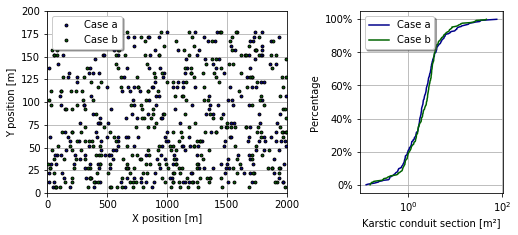

In [17]:
fig = plt.figure(figsize=(18*cm,8*cm),constrained_layout=True)
width = [2,1.2]
gs  = fig.add_gridspec(1,2,width_ratios=width)
fig_ax1 = fig.add_subplot(gs[0,0])
fig_ax2 = fig.add_subplot(gs[0,1])

#fig 1
fig_ax1.scatter(out_plot.pos_x[out_plot.case_nb==1], out_plot.pos_y[out_plot.case_nb==1], edgecolor='black', marker='o',s=8, color ='darkblue',zorder=5, label='Case a')
fig_ax1.scatter(out_plot.pos_x[out_plot.case_nb==2], out_plot.pos_y[out_plot.case_nb==2], edgecolor='black', marker='o',s=8, color ='darkgreen',zorder=5, label='Case b')
fig_ax1.set_xlim([0,2000])
fig_ax1.set_ylim([0,200])
fig_ax1.grid()
fig_ax1.set_xlabel('X position [m]')
fig_ax1.set_ylabel('Y position [m]')
fig_ax1.margins(0,0)
fig_ax1.legend( facecolor='white',shadow=True,framealpha=1)

#fig 2
bins_str_1 = np.linspace(1, 4,20)
bins_str_2 = np.linspace(1.2, 4.2,20)
data = np.sort(np.pi*(out_plot.pipe_diam[out_plot.case_nb==1]*0.5)**2)
p = 1. * np.arange(len(data)) / (len(data) - 1)
fig_ax2.plot(data,p, color='darkblue', linewidth=1.5)
data = np.sort(np.pi*(out_plot.pipe_diam[out_plot.case_nb==2]*0.5)**2)
p = 1. * np.arange(len(data)) / (len(data) - 1)
fig_ax2.plot(data,p, color='darkgreen', linewidth=1.5)
fig_ax2.set_xscale('log')
fig_ax2.grid(which='both')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1,decimals=0))
fig_ax2.set_xlabel('Karstic conduit section [m²]')
fig_ax2.set_ylabel('Percentage')
fig_ax2.legend(['Case a','Case b'],shadow=True)

plt.savefig('image_2021/tunnel_position_and_distri.png',dpi=300, bbox_inches='tight')
plt.show()

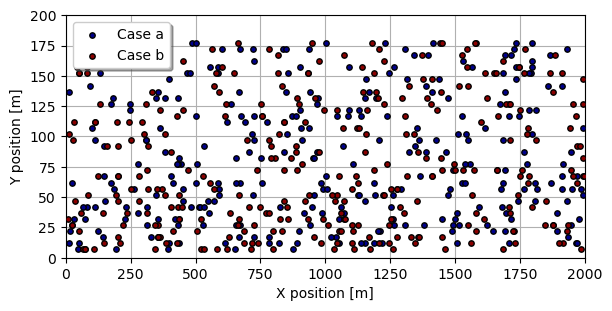

In [146]:
out_plot = out_df[0]
plt.figure(figsize=(17*cm,8*cm))
plt.scatter(out_plot.pos_x[out_plot.case_nb==1], out_plot.pos_y[out_plot.case_nb==1], edgecolor='black', marker='o',s=15, color ='darkblue',zorder=5, label='Case a')
plt.scatter(out_plot.pos_x[out_plot.case_nb==2], out_plot.pos_y[out_plot.case_nb==2], edgecolor='black', marker='o',s=15, color ='darkred',zorder=5, label='Case b')

plt.xlim([0,2000])
plt.ylim([0,200])
plt.tick_params()
plt.grid()
plt.xlabel('X position [m]')
plt.ylabel('Y position [m]')
plt.margins(0,0)
plt.legend( facecolor='white',shadow=True,framealpha=1)
plt.savefig('image_2021/tunnel_position_type.png',dpi=300, bbox_inches='tight')
plt.show()

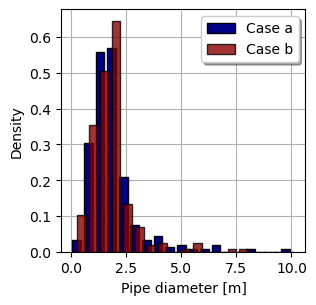

In [132]:
plt.figure(figsize=(8*cm,8*cm))
out_plot = out_df[0]
bins_str_1 = np.linspace(0, 10,20)
bins_str_2 = np.linspace(0.2, 10.2,20)
plt.hist(out_plot.pipe_diam[out_plot.case_nb==1], bins=bins_str_1, density=True, rwidth=0.75,zorder=4, edgecolor='black',color='darkblue')
plt.hist(out_plot.pipe_diam[out_plot.case_nb==2], bins=bins_str_2, density=True, rwidth=0.75,zorder=4, edgecolor='black',color='darkred', alpha=0.8)

plt.xlabel('Pipe diameter [m]')
plt.ylabel('Density')
plt.grid()
plt.legend(['Case a','Case b'],shadow=True)
plt.savefig('image_2021/pipe_diameter_distribution_karst.png',dpi=300, bbox_inches='tight')
plt.show()

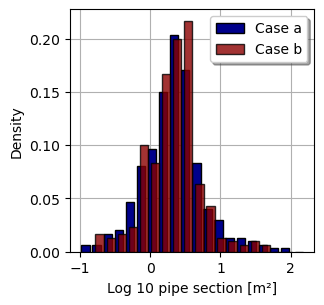

In [133]:
plt.figure(figsize=(8*cm,8*cm))
out_plot = out_df[0]
bins_str_1 = np.linspace(-1, 2,20)
bins_str_2 = np.linspace(-0.8, 2.2,20)
plt.hist(np.log10((out_plot.pipe_diam[out_plot.case_nb==1]*0.5)**2*np.pi),weights=np.ones(len(out_plot.pipe_diam[out_plot.case_nb==1]))/len(out_plot.pipe_diam[out_plot.case_nb==1]), bins=bins_str_1, density=False, rwidth=0.75,zorder=4, edgecolor='black',color='darkblue')
plt.hist(np.log10((out_plot.pipe_diam[out_plot.case_nb==2]*0.5)**2*np.pi),weights=np.ones(len(out_plot.pipe_diam[out_plot.case_nb==2]))/len(out_plot.pipe_diam[out_plot.case_nb==2]), bins=bins_str_2, density=False, rwidth=0.75,zorder=4, edgecolor='black',color='darkred', alpha=0.8)

plt.xlabel('Log 10 pipe section [m²]')
plt.ylabel('Density')
plt.grid()
plt.legend(['Case a','Case b'],shadow=True)
plt.savefig('image_2021/pipe_sectionlog_distribution_karst.png',dpi=300, bbox_inches='tight')
plt.show()

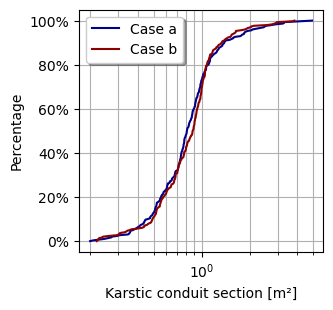

In [139]:
plt.figure(figsize=(8*cm, 8*cm))

bins_str_1 = np.linspace(1, 4,20)
bins_str_2 = np.linspace(1.2, 4.2,20)

data = np.sort((out_plot.pipe_diam[out_plot.case_nb==1]*0.5))
p = 1. * np.arange(len(data)) / (len(data) - 1)
plt.plot(data,p, color='darkblue', linewidth=1.5)

data = np.sort((out_plot.pipe_diam[out_plot.case_nb==2]*0.5))
p = 1. * np.arange(len(data)) / (len(data) - 1)
plt.plot(data,p, color='darkred', linewidth=1.5)
plt.xscale('log')

plt.grid(which='both')

plt.xlabel('Karstic conduit section [m²]')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1,decimals=0))
plt.ylabel('Percentage')
plt.legend(['Case a','Case b'],shadow=True)
plt.savefig('image_2021/pipe_section_distribution.png',dpi=300, bbox_inches='tight')
plt.show()

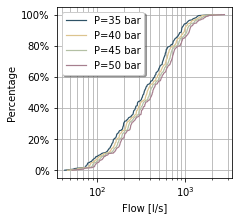

In [75]:
plt.figure(figsize=(8*cm,8*cm))

for i in range(len(out_df)):
    out_plot = out_df[i]

    bins_str_1 = np.linspace(1, 4,20)
    from matplotlib.ticker import PercentFormatter
    bins_str_2 = np.linspace(1.2, 4.2,20)

    data = np.sort((out_plot.flow_rate[out_plot.case_nb==1]*1000))
    p = 1. * np.arange(len(data)) / (len(data) - 1)
    plt.plot(data,p, color=color_pall_3[i], linewidth=1.2,zorder=9,label='P={} bar'.format(pressure_list[i]))
    
    plt.legend(shadow=True)
    plt.xscale('log')
    plt.xlabel('Flow [l/s]')
    plt.ylabel('Percentage')
    plt.tick_params()
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1,decimals=0))
plt.grid(which='both')    
plt.savefig('image_2021/flow_rates.png', dpi=300, bbox_inches='tight')

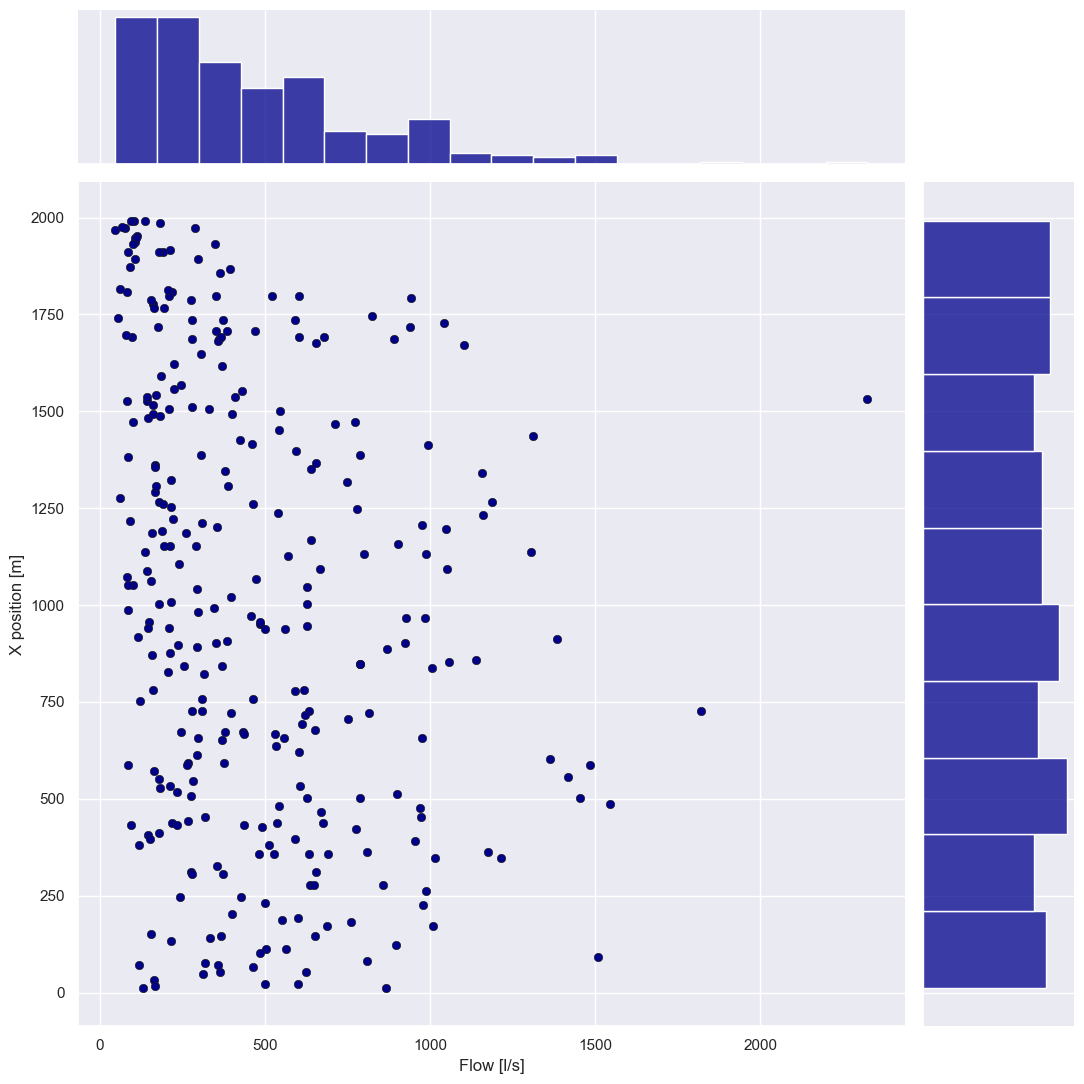

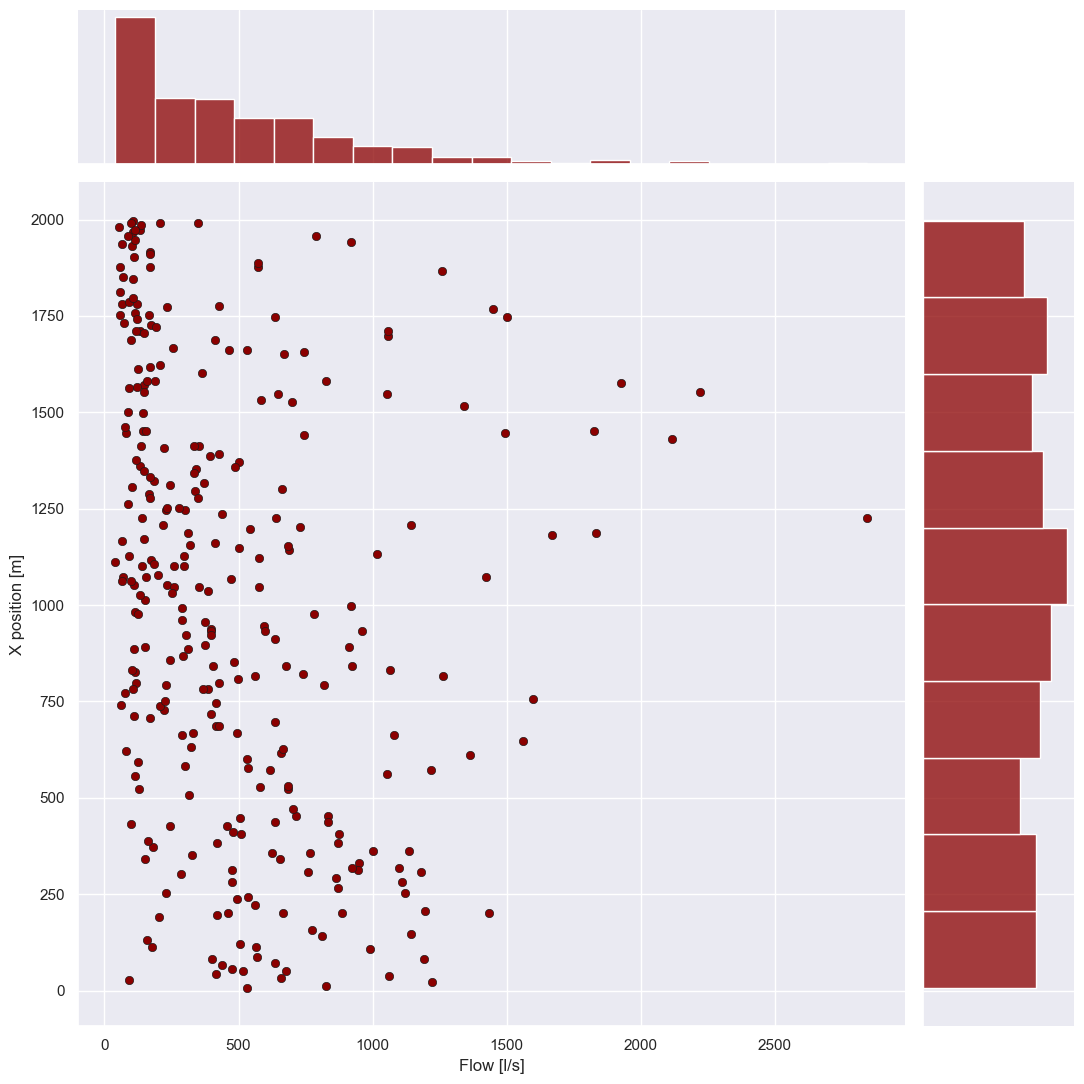

In [207]:
#position vs flow vs case
import seaborn as sns
sns.set_style("whitegrid")
out_plot = out_df[1]

sns.set(rc={'figure.figsize':(8*cm,8*cm)})
h = sns.jointplot(y=out_plot.pos_x[out_plot.case_nb==1], x=out_plot.flow_rate[out_plot.case_nb==1]*1000,height=11,color='darkblue',edgecolor='k')
# JointGrid has a convenience function
h.set_axis_labels( 'Flow [l/s]', 'X position [m]')
h.ax_joint.tick_params()
plt.tight_layout()
#plt.title('P = '+ str(cave_pressures[i])  + ' bar',size = 15)
plt.savefig('image_2021/flow_rates_cas1_distri_40b.png', dpi=300, bbox_inches='tight')

h = sns.jointplot(y=out_plot.pos_x[out_plot.case_nb==2], x=out_plot.flow_rate[out_plot.case_nb==2]*1000,height=11,color='darkred',edgecolor='k')
# JointGrid has a convenience function
h.set_axis_labels( 'Flow [l/s]', 'X position [m]')
h.ax_joint.tick_params()
plt.tight_layout()
plt.savefig('image_2021/flow_rates_cas2_distri_40b.png', dpi=300, bbox_inches='tight')

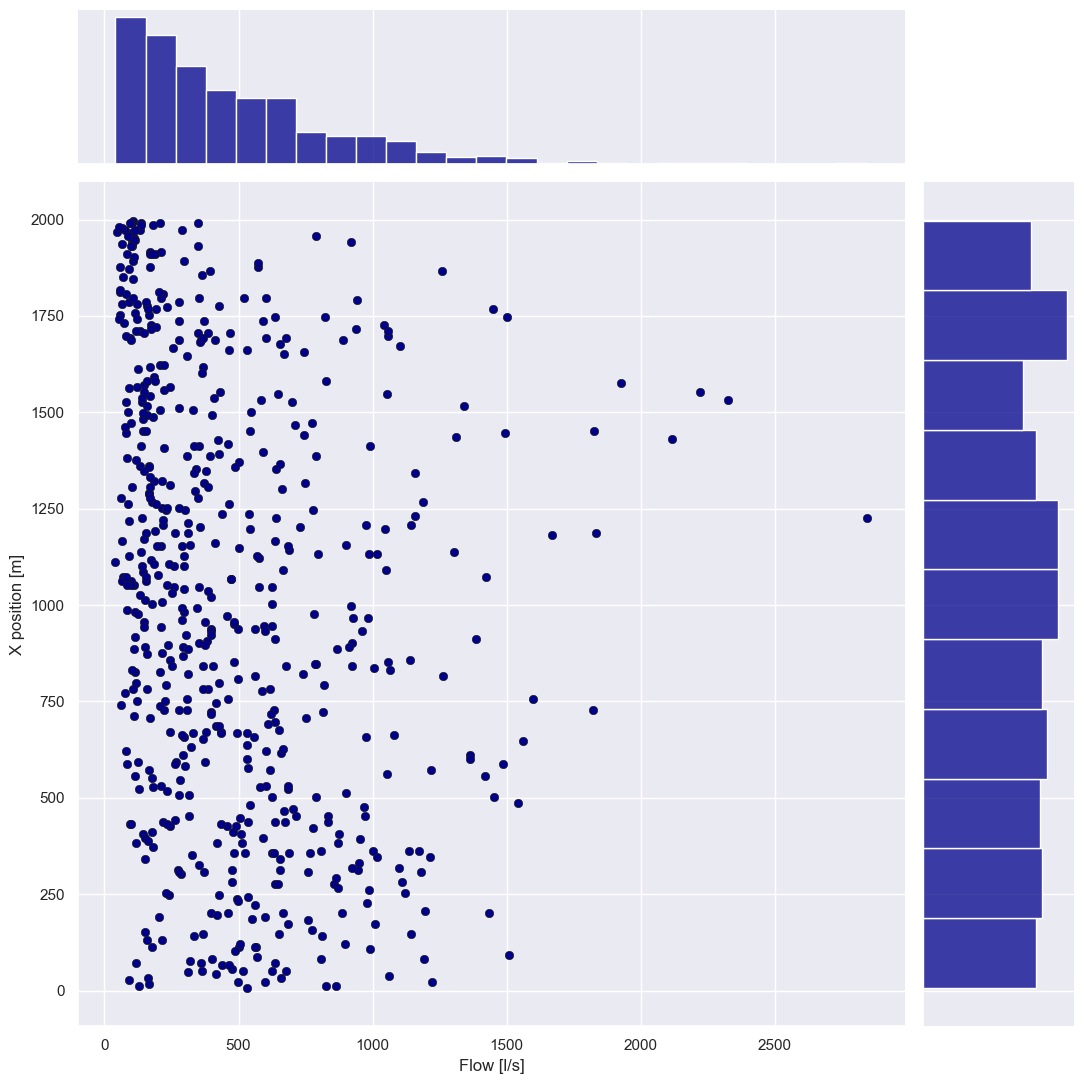

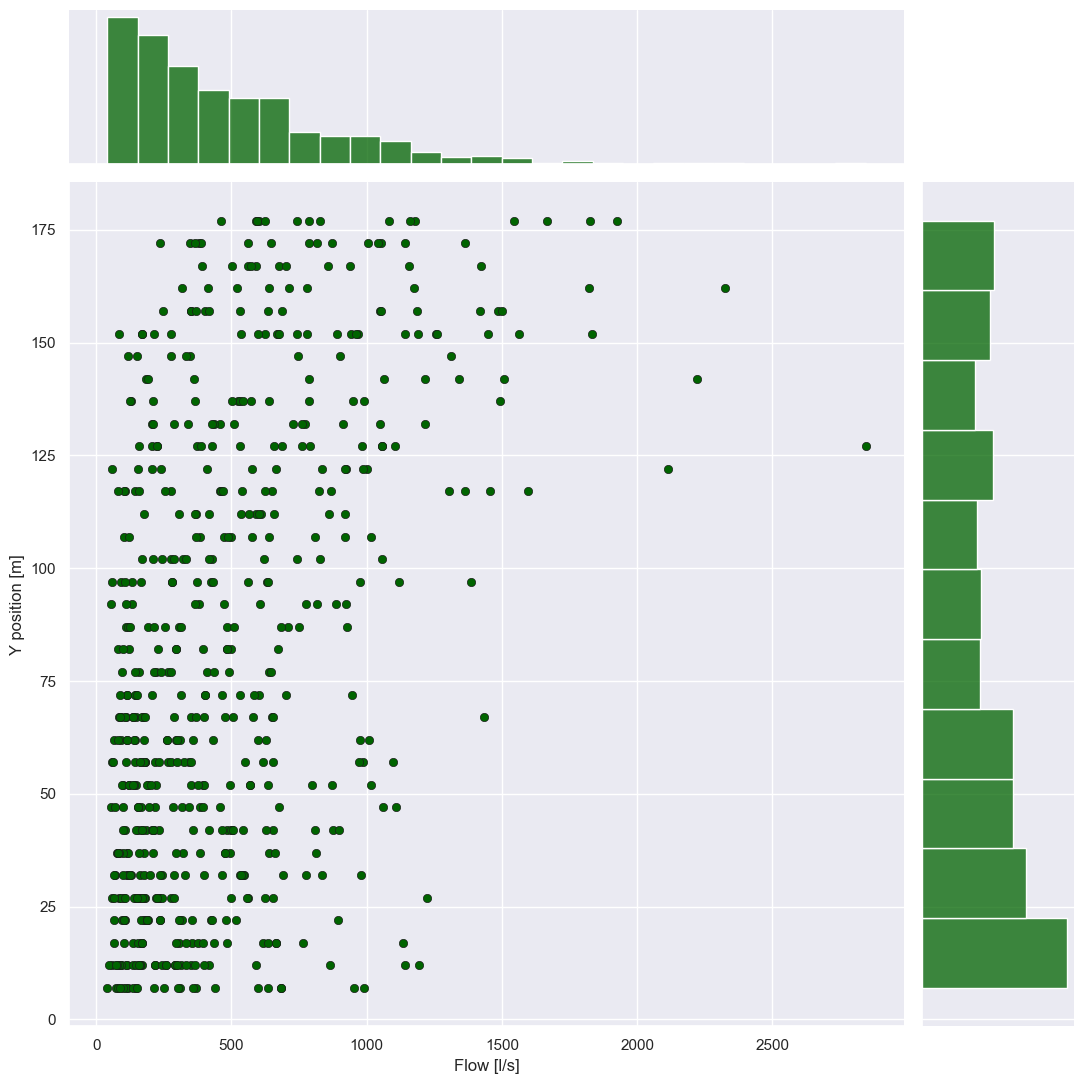

In [210]:
#position vs flow all case
out_plot = out_df[1]

sns.set(rc={'figure.figsize':(8*cm,8*cm)})
h = sns.jointplot(y=out_plot.pos_x, x=out_plot.flow_rate*1000,height=11,color='darkblue',edgecolor='k')
# JointGrid has a convenience function
h.set_axis_labels( 'Flow [l/s]', 'X position [m]')
h.ax_joint.tick_params()
plt.tight_layout()
#plt.title('P = '+ str(cave_pressures[i])  + ' bar',size = 15)
plt.savefig('image_2021/flow_rates_40b_distri_posX.pdf', bbox_inches='tight')

sns.set(rc={'figure.figsize':(8*cm,8*cm)})
h = sns.jointplot(y=out_plot.pos_y, x=out_plot.flow_rate*1000,height=11,color='darkgreen',edgecolor='k')
# JointGrid has a convenience function
h.set_axis_labels( 'Flow [l/s]', 'Y position [m]')
h.ax_joint.tick_params()
plt.tight_layout()
#plt.title('P = '+ str(cave_pressures[i])  + ' bar',size = 15)
plt.savefig('image_2021/flow_rates_40b_distri_posY.pdf', bbox_inches='tight')

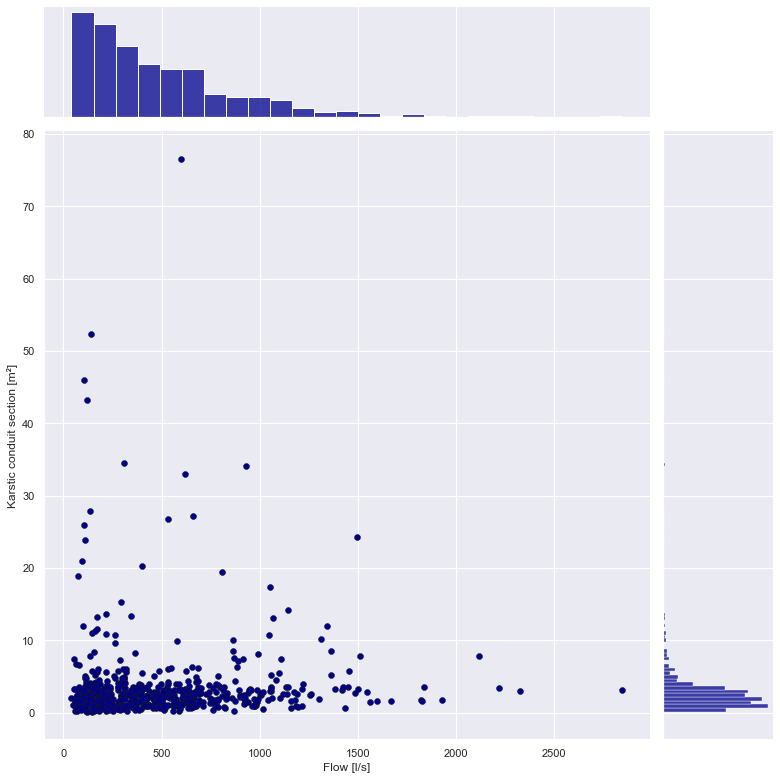

In [42]:
#all case
out_plot = out_df[1]

sns.set(rc={'figure.figsize':(8*cm,8*cm)})
h = sns.jointplot(y=np.pi*(out_plot.pipe_diam/2)**2, x=out_plot.flow_rate*1000,height=11,color='darkblue',edgecolor='k')
# JointGrid has a convenience function
h.set_axis_labels( 'Flow [l/s]', 'Karstic conduit section [m²]')
h.ax_joint.tick_params()
plt.tight_layout()
#plt.title('P = '+ str(cave_pressures[i])  + ' bar',size = 15)
plt.savefig('image_2021/flow_vs_karstic_conduit_40bar.png', dpi=300, bbox_inches='tight')

In [212]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

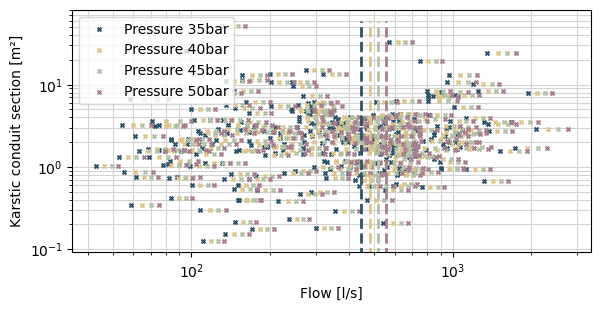

In [116]:
fig = plt.figure(figsize=(17*cm,8*cm))
for i in range(len(out_df)):
    out_plot = out_df[i]
    plt.scatter((out_plot.flow_rate*1000)[::2], (np.pi*(out_plot.pipe_diam/2)**2)[::2], color=color_pall_3[i], marker='x',s=8, zorder=3,alpha =1, edgecolor='black', label='Pressure {}bar'.format(pressure_list[i]))
    plt.vlines(np.nanmean(out_plot.flow_rate*1000),0,60,color=color_pall_3[i],zorder=11,linewidth=2, linestyle='--',alpha=1)
    plt.xscale('log')
    plt.ylabel('Karstic conduit section [m²]')
    plt.yscale('log')
    plt.xlabel('Flow [l/s]')
    plt.legend(loc=0)
    plt.tick_params()
plt.grid(b=True,which='both',zorder=-2, color='lightgrey')
plt.savefig('image_2021/flux_vs_karstic_all_pression_1.png')
plt.show()

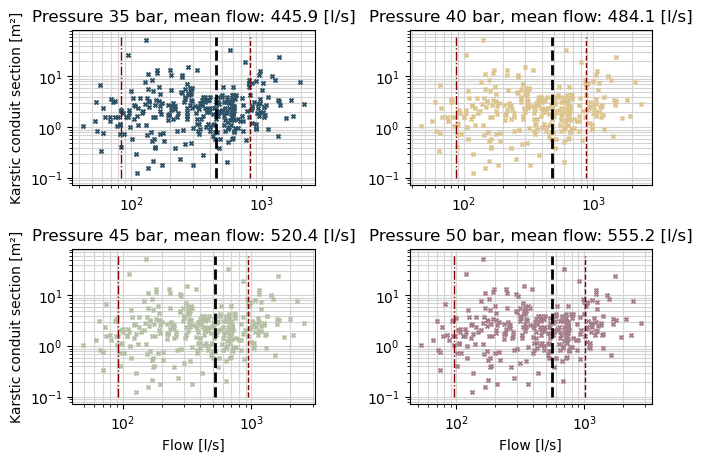

In [213]:
mpl.rcParams.update(mpl.rcParamsDefault)
fig, axs = plt.subplots(2,2,figsize=(18*cm,12*cm))
count=0
for i in range(2):
    for j in range(2):
        out_plot = out_df[count]
        axs[i,j].scatter((out_plot.flow_rate*1000)[::2], (np.pi*(out_plot.pipe_diam/2)**2)[::2], color=color_pall_3[count], marker='x',s=8, zorder=3,alpha =1, edgecolor='black')
        axs[i,j].vlines(np.nanmean(out_plot.flow_rate*1000),0.1,60,color='black',zorder=11,linewidth=2, linestyle='--',alpha=1,label='Mean value = {:0.1f} [l/s]'.format(np.nanmean(out_plot.flow_rate*1000)))
        axs[i,j].vlines(np.nanmean(out_plot.flow_rate*1000)-np.std(out_plot.flow_rate*1000),0.1,60,color='maroon',zorder=11,linewidth=1, linestyle='-.',alpha=1, label='std')
        axs[i,j].vlines(np.nanmean(out_plot.flow_rate*1000)+np.std(out_plot.flow_rate*1000),0.1,60,color='maroon',zorder=11,linewidth=1, linestyle='--',alpha=1)

        axs[i,j].set_xscale('log')
        axs[i,j].set_title('Pressure {} bar, mean flow: {:0.1f} [l/s]'.format(pressure_list[count],np.nanmean(out_plot.flow_rate*1000)))
        axs[i,j].set_yscale('log')
        #axs[i,j].legend(loc=0)
        axs[i,j].tick_params()
        axs[i,j].grid(b=True,which='both',zorder=-2, color='lightgrey')
        count +=1
        
axs[1,0].set_ylabel('Karstic conduit section [m²]')
axs[0,0].set_ylabel('Karstic conduit section [m²]')
axs[1,0].set_xlabel('Flow [l/s]')
axs[1,1].set_xlabel('Flow [l/s]')

plt.tight_layout()
plt.savefig('image_2021/flow_vs_karst.png', dpi=300, bbox_inches='tight')
plt.show()

In [80]:
for i in range(4):
    out = out_df[i]
    print('******')
    print('Bar : {}'.format(pressure_list[i]))
    print('Min value : {:0.2f} '.format(np.nanmin(out.flow_rate*1000)))       
    print('Median value : {:0.2f} '.format(np.nanmedian(out.flow_rate*1000)))
    print('Mean value : {:0.2f} '.format(np.nanmean(out.flow_rate*1000)))
    print('Max value : {:0.2f} '.format(np.nanmax(out.flow_rate*1000)))

******
Bar : 35
Min value : 35.89 
Median value : 343.65 
Mean value : 445.86 
Max value : 2598.83 
******
Bar : 40
Min value : 41.01 
Median value : 371.91 
Mean value : 484.09 
Max value : 2844.46 
******
Bar : 45
Min value : 46.12 
Median value : 400.60 
Mean value : 520.43 
Max value : 3077.65 
******
Bar : 50
Min value : 50.98 
Median value : 427.54 
Mean value : 555.17 
Max value : 3299.67 


In [78]:
for i in range(4):
    out = out_df[i][out_df[i].case_nb==1]
    print('******')
    print('Bar : {}'.format(pressure_list[i]))
    print('Min value : {:0.2f} '.format(np.nanmin(out.flow_rate*1000)))       
    print('Median value : {:0.2f} '.format(np.nanmedian(out.flow_rate*1000)))
    print('Mean value : {:0.2f} '.format(np.nanmean(out.flow_rate*1000)))
    print('Max value : {:0.2f} '.format(np.nanmax(out.flow_rate*1000)))

******
Bar : 35
Min value : 43.13 
Median value : 340.92 
Mean value : 435.46 
Max value : 2093.36 
******
Bar : 40
Min value : 46.38 
Median value : 368.70 
Mean value : 472.61 
Max value : 2324.07 
******
Bar : 45
Min value : 49.46 
Median value : 396.16 
Mean value : 507.91 
Max value : 2544.01 
******
Bar : 50
Min value : 52.40 
Median value : 424.80 
Mean value : 541.67 
Max value : 2758.60 


In [79]:
for i in range(4):
    out = out_df[i][out_df[i].case_nb==2]
    print('******')
    print('Bar : {}'.format(pressure_list[i]))
    print('Min value : {:0.2f} '.format(np.nanmin(out.flow_rate*1000)))       
    print('Median value : {:0.2f} '.format(np.nanmedian(out.flow_rate*1000)))
    print('Mean value : {:0.2f} '.format(np.nanmean(out.flow_rate*1000)))
    print('Max value : {:0.2f} '.format(np.nanmax(out.flow_rate*1000)))

******
Bar : 35
Min value : 35.89 
Median value : 356.25 
Mean value : 456.27 
Max value : 2598.83 
******
Bar : 40
Min value : 41.01 
Median value : 384.94 
Mean value : 495.57 
Max value : 2844.46 
******
Bar : 45
Min value : 46.12 
Median value : 412.30 
Mean value : 532.94 
Max value : 3077.65 
******
Bar : 50
Min value : 50.98 
Median value : 438.54 
Mean value : 568.66 
Max value : 3299.67 


## Permeability test

In [237]:
def read_pickle(path):
    with open(path,'rb') as f:
        file = pickle.load(f)
    return file

In [238]:
columns_names = ['time_step', 'flow_rate', 'pos_x', 'pos_y', 'pipe_diam', 'seed']
colors = ['darkblue','darkred','darkorange']

In [239]:
pressure_list = [35,40,45,50]
out_list_p = []


for i in range(5):
    path = 'output_2021/out_permea_2021/output_simulations_{}.pickle'.format(i)
    out_list_p.append(read_pickle(path))
        

In [240]:
out_df_p = []
for out in out_list_p:
    data = {}
    data['time_step'] = [t[0] for t in out[:,2]]
    data['flow_rate'] = [t[1] for t in out[:,2]]
    data['pos_x']     = [t[0] for t in out[:,3]]
    data['pos_y']     = [t[1] for t in out[:,3]]
    data['pipe_diam'] = [t[3] for t in out[:,3]]
    data['seed']      = [t for t in out[:,4]]
    data['case_nb']   = [t for t in out[:,5]]
    out_df_p.append(pd.DataFrame(data))

In [241]:
out_df_p[1].head(3)

,time_step,flow_rate,pos_x,pos_y,pipe_diam,seed,case_nb
0,1.0,0.689546,782.0,17.0,6.4778,200000008,1
1,1.0,1.081977,1092.0,157.0,4.7037,200000008,1
2,1.0,0.591303,482.0,42.0,1.6123,200000008,1


In [243]:
len(out_df_p)

5

In [244]:
for i in range(5):
    out = out_df_p[i]
    print('******')
    print('Bar : {}'.format(permea[i]))
    print('Min value : {:0.2f} '.format(np.nanmin(out.flow_rate*1000)))       
    print('Median value : {:0.2f} '.format(np.nanmedian(out.flow_rate*1000)))
    print('Mean value : {:0.2f} '.format(np.nanmean(out.flow_rate*1000)))
    print('Max value : {:0.2f} '.format(np.nanmax(out.flow_rate*1000)))


******
Bar : 1e-7
Min value : 57.10 
Median value : 380.84 
Mean value : 459.70 
Max value : 1562.29 
******
Bar : 5.e-7
Min value : 98.68 
Median value : 445.12 
Mean value : 530.63 
Max value : 1591.10 
******
Bar : 1.e-6
Min value : 116.70 
Median value : 509.90 
Mean value : 597.71 
Max value : 1626.24 
******
Bar : 5.e-6
Min value : 184.56 
Median value : 851.82 
Mean value : 929.46 
Max value : 2022.11 
******
Bar : 1.e-5
Min value : 214.01 
Median value : 1168.59 
Mean value : 1196.98 
Max value : 2546.27 


In [220]:
c_0 = [151, 157, 172]
c_1 = [92, 103, 125]
c_2 = [4, 102, 200]
c_3 = [2, 62, 125]
c_4 = [46, 82, 102]
c_5 = [0, 18, 51]

color_degr = [c_0, c_1, c_2, c_3, c_4, c_5]
color_degr = [[idc/255 for idc in col] for col in color_degr]

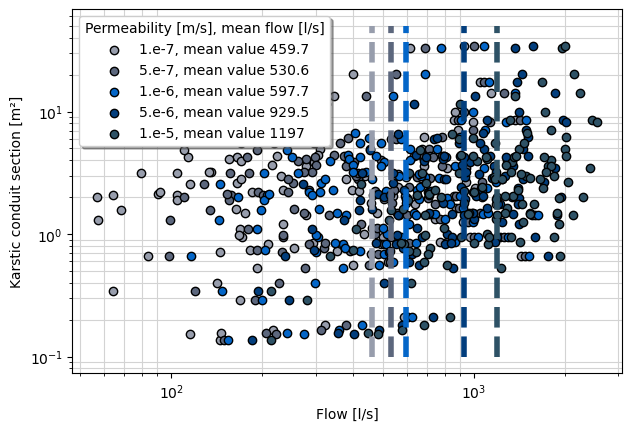

In [247]:
plt.figure(figsize=(18*cm,12*cm))
permea     = ['1.e-7','5.e-7','1.e-6','5.e-6','1.e-5']
mean_value = [459.7, 530.6, 597.7, 929.5,1197]

for i in range(5):
    plt.scatter(out_df_p[i].flow_rate*1000, np.pi*(out_df_p[i].pipe_diam/2)**2, edgecolor='black', color =color_degr[i], marker='o',  label='{}, mean value {}'.format(permea[i],str(mean_value[i])), zorder=3)
    plt.vlines(np.nanmean(out_df_p[i].flow_rate*1000),0.1,50,linewidth=4,color=color_degr[i],zorder=11,linestyle='--')

plt.xscale('log')
plt.ylabel('Karstic conduit section [m²]')
plt.yscale('log')
plt.xlabel('Flow [l/s]')
plt.legend(title='Permeability [m/s], mean flow [l/s]',shadow=True)
plt.grid(color='lightgrey', which='minor')
plt.savefig('image_2021/test_permeability_flow.png',dpi=300, bbox_inches='tight')
plt.show()

## Read save head vtk   

In [12]:
import pyvista as pv    

In [41]:
re_set = []
f_set  = []
v_set  = []
for i in pressure_list:
    count = 0
    re_cas_1 = []
    f_cas_1  = []
    v_cas_1  = []
    re_cas_2 = []
    f_cas_2  = []
    v_cas_2  = []
    
    for j in range(5):
        path = 'output_2021/out_{}bar_2021/out_{}/save_karst/'.format(i,j)
        for nb in range(10):
            cas_1 = pv.read(path+'karst_flow_1d_2000000{:02}_cas_1.vtk'.format(count))
            cas_2 = pv.read(path+'karst_flow_1d_2000000{:02}_cas_2.vtk'.format(count))
            re_cas_1.append(cas_1['Re[-]'])
            f_cas_1.append(cas_1['f[-]'])
            v_cas_1.append(cas_1['v[m/s]'])
            re_cas_2.append(cas_2['Re[-]'])
            f_cas_2.append(cas_2['f[-]'])
            v_cas_2.append(cas_2['v[m/s]'])
            count+=1
            
        
    re_set.append([np.concatenate(re_cas_1),np.concatenate(re_cas_2)])
    f_set.append([np.concatenate(f_cas_1),np.concatenate(f_cas_2)])
    v_set.append([np.concatenate(v_cas_1),np.concatenate(v_cas_2)])

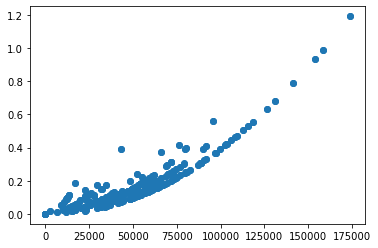

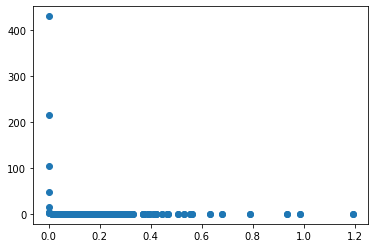

In [51]:
plt.scatter(re_set[0][0][:500],v_set[0][0][:500])
plt.show()
plt.scatter(v_set[0][0][:500],f_set[0][0][:500])

In [69]:
f_set[i][1].shape, f_set[i][1][f_set[i][1]<np.quantile(f_set[i][1],0.99)].shape

((300173,), (297171,))

In [73]:
for i in range(len(pressure_list)):
    quantile = 0.999
    minv  = min([np.min(f_set[i][0]),np.min(f_set[i][1])])
    medianv = np.median(np.concatenate([f_set[i][0],f_set[i][1]]))
    meanv = np.mean(np.concatenate([f_set[i][0][f_set[i][0]<np.quantile(f_set[i][0],quantile)],f_set[i][1][f_set[i][1]<np.quantile(f_set[i][1],quantile)]]))
    maxv  = max([np.max(f_set[i][0][f_set[i][0]<np.quantile(f_set[i][0],quantile)]),np.max(f_set[i][1][f_set[i][1]<np.quantile(f_set[i][1],quantile)])])
    print('***{} bar***'.format(pressure_list[i]))
    print('min value : {:0.3f}'.format(minv))
    print('median value : {:0.3f}'.format(medianv))
    print('mean value : {:0.3}'.format(meanv))
    print('max value : {:0.3f}\n'.format(maxv))

***35 bar***
min value : 0.024
median value : 0.069
mean value : 1.53
max value : 640.885

***40 bar***
min value : 0.024
median value : 0.069
mean value : 1.38
max value : 584.427

***45 bar***
min value : 0.024
median value : 0.069
mean value : 1.3
max value : 560.315

***50 bar***
min value : 0.024
median value : 0.069
mean value : 1.2
max value : 512.406



In [70]:
path  = 'output_2021/out_{}bar_2021/out_0/save_head/'.format(35)
files = os.listdir(path)    
#flow_3d_cas_1 = pv.read(path+files[0])

In [66]:
path_karst = 'output_2021/out_{}bar_2021/out_0/save_karst/'.format(35)
files = os.listdir(path_karst)    

In [72]:
files[0][18:]

'cas_1.vtk'

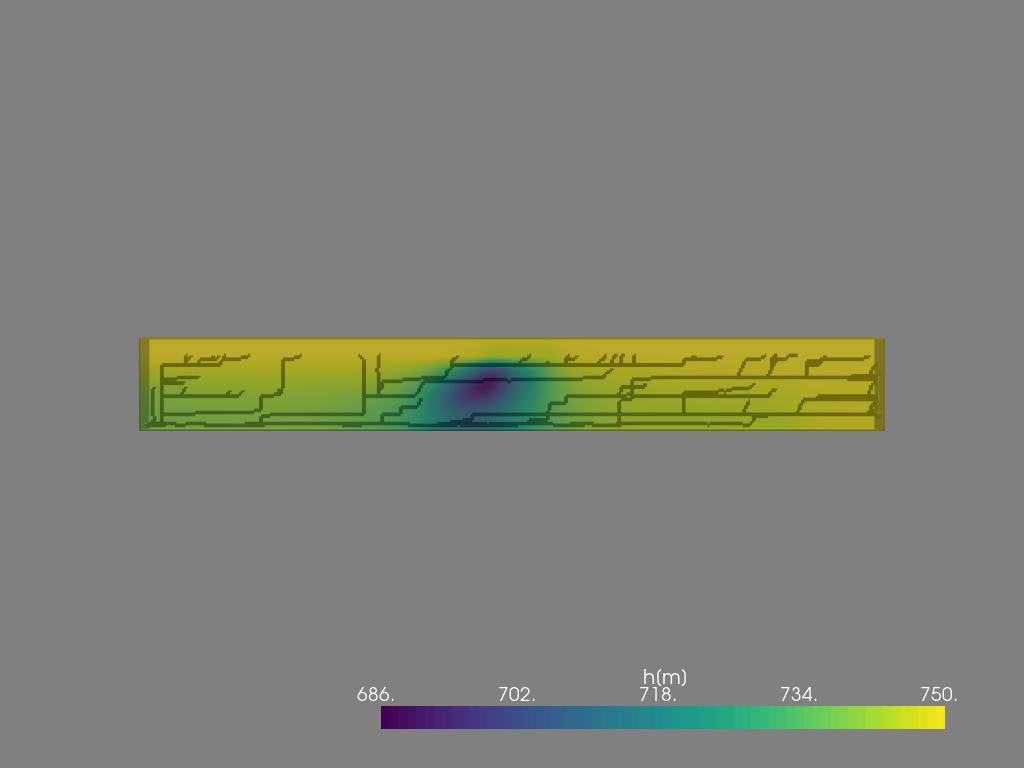

In [83]:
#4 pressure for karst type 1
out = 2
karst_nb = 5 #seulement des chiffres impaires pour le cas 1
for i in (pressure_list[0:1]):
    path_head  = 'output_2021/out_{}bar_2021/out_{}/save_head/'.format(i, out)    
    path_karst = 'output_2021/out_{}bar_2021/out_{}/save_karst/'.format(i, out)
    files_head = os.listdir(path_head)
    name_head  = files_head[karst_nb][8:]
    
    if name_head[0][18:]!='cas_1.vtk':
        karst_nb +=1
        files_head = os.listdir(path_head)
        name_head  = files_head[karst_nb][8:]
        

    flow_3d_cas1  = pv.read(path_head+files_head[0])    
    karst_1d_cas1 = pv.read(path_karst+'karst_1d_'+name_head)

    
    plotter = pv.Plotter()
    cpos = (0.0,-10.0,0.0)
    #cpos = (10.0,.0,0.0)
    plotter.camera_set = True
    plotter.set_background('grey')
    plotter.add_mesh(flow_3d_cas1, opacity=0.6, smooth_shading=True, cmap='viridis')#clim=[400,400+int(i)*10])
    plotter.add_mesh(karst_1d_cas1, color='black', line_width=4, categories=True)
    plotter.show(use_panel=True,cpos=cpos)


In [39]:
flow_3d_cas_1 = pv.read('output_2021/out_35bar_2021/out_0/save_head/flow_3d_200000000_cas_1.vtk')
flow_3d_cas_2 = pv.read('output_2021/out_35bar_2021/out_0/save_head/flow_3d_200000000_cas_1.vtk')

In [40]:
flow_3d_cas_1

UnstructuredGrid (0x1d5d6bdef48)
  N Cells:	440000
  N Points:	470373
  X Bounds:	0.000e+00, 2.000e+03
  Y Bounds:	0.000e+00, 1.100e+02
  Z Bounds:	0.000e+00, 2.500e+02
  N Arrays:	4

In [41]:
keys = flow_3d_cas_1.array_names
keys

['h[m]', 'v[m/s]', 'Re[-]', 'f[-]']

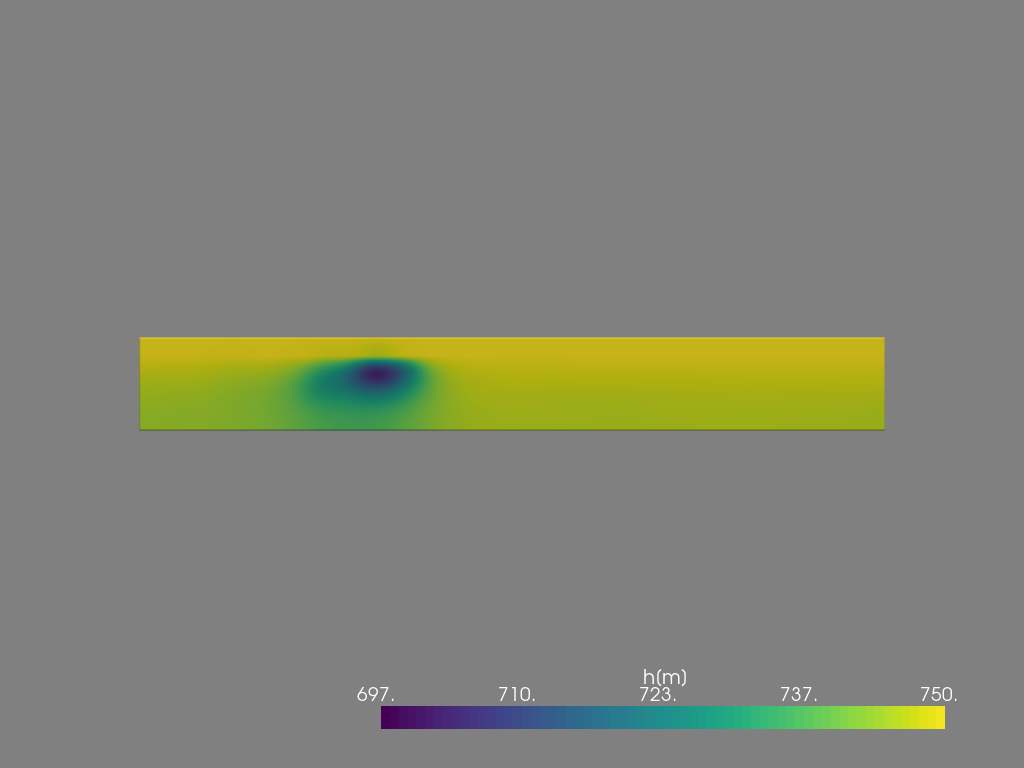

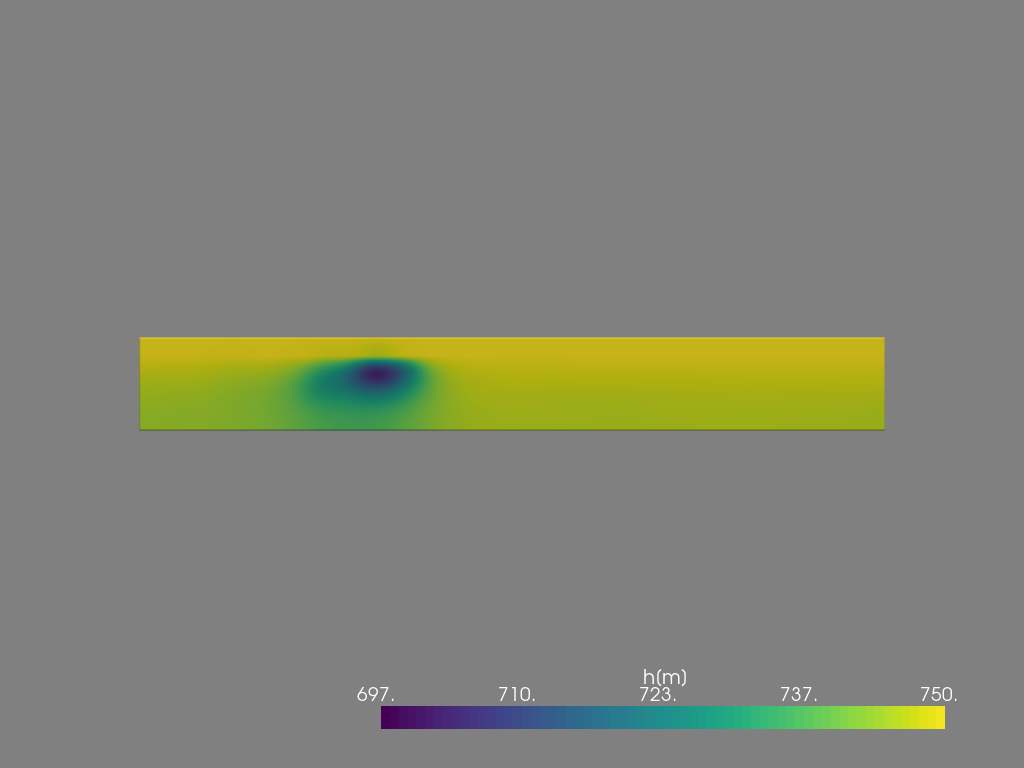

In [43]:
plotter = pv.Plotter()
cpos = (0.0,-10.0,0.0)
#cpos = (10.0,.0,0.0)
plotter.camera_set = True
plotter.set_background('grey')
plotter.add_mesh(flow_3d_cas_1,opacity=1,smooth_shading=True,line_width=5)
plotter.show(use_panel=True,cpos=cpos)
plotter = pv.Plotter()
cpos = (0.0,-10.0,0.0)
#cpos = (10.0,.0,0.0)
plotter.camera_set = True
plotter.set_background('grey')
plotter.add_mesh(flow_3d_cas_2,opacity=1,smooth_shading=True,line_width=5)
plotter.show(use_panel=True,cpos=cpos)

## Read save karst vtk

In [10]:
karst_1d_cas1 = pv.read('simu_out_21-07-2021/save_karst/karst_1d_200000000_cas_1.vtk')
karst_1d_cas2 = pv.read('simu_out_21-07-2021/save_karst/karst_1d_200000000_cas_2.vtk')

In [11]:
karst_1d_cas1

UnstructuredGrid (0x7f6ca14879a0)
  N Cells:	4510
  N Points:	4458
  X Bounds:	7.000e+00, 1.997e+03
  Y Bounds:	5.500e+01, 5.500e+01
  Z Bounds:	7.000e+00, 2.020e+02
  N Arrays:	1

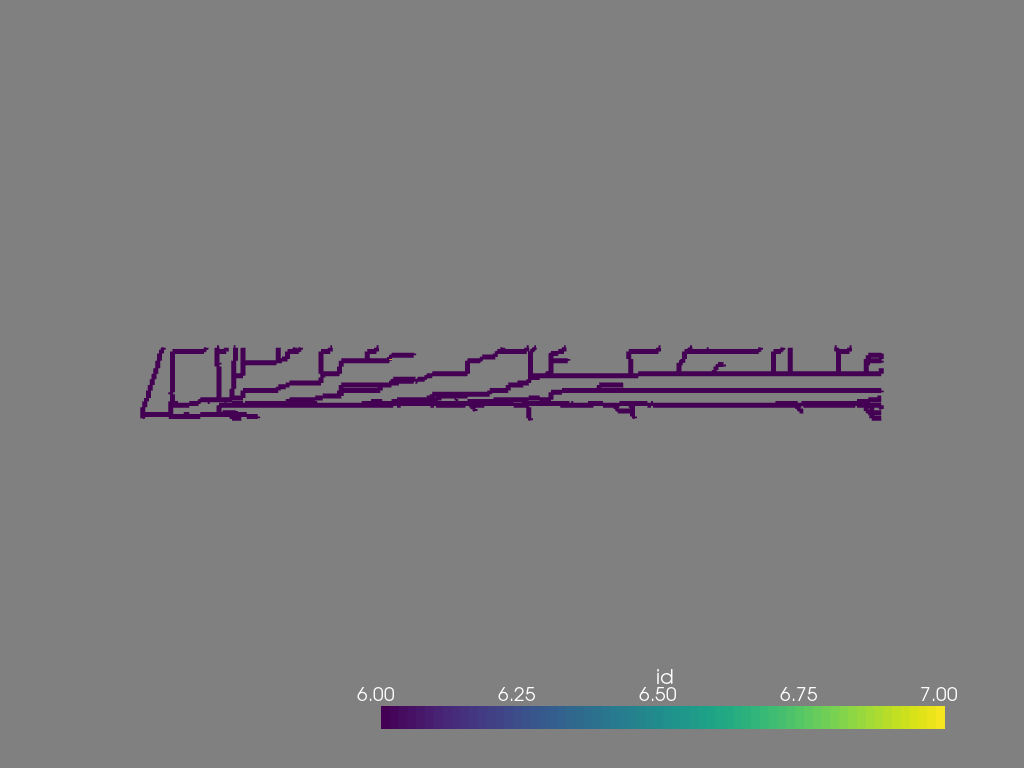

In [90]:
plotter = pv.Plotter()
cpos = (0.0,-10.0,0.0)
#cpos = (10.0,.0,0.0)
plotter.camera_set = True
plotter.set_background('grey')
plotter.add_mesh(karst_1d_cas1 ,opacity=1,smooth_shading=True,line_width=5)
plotter.show(use_panel=True,cpos=cpos)

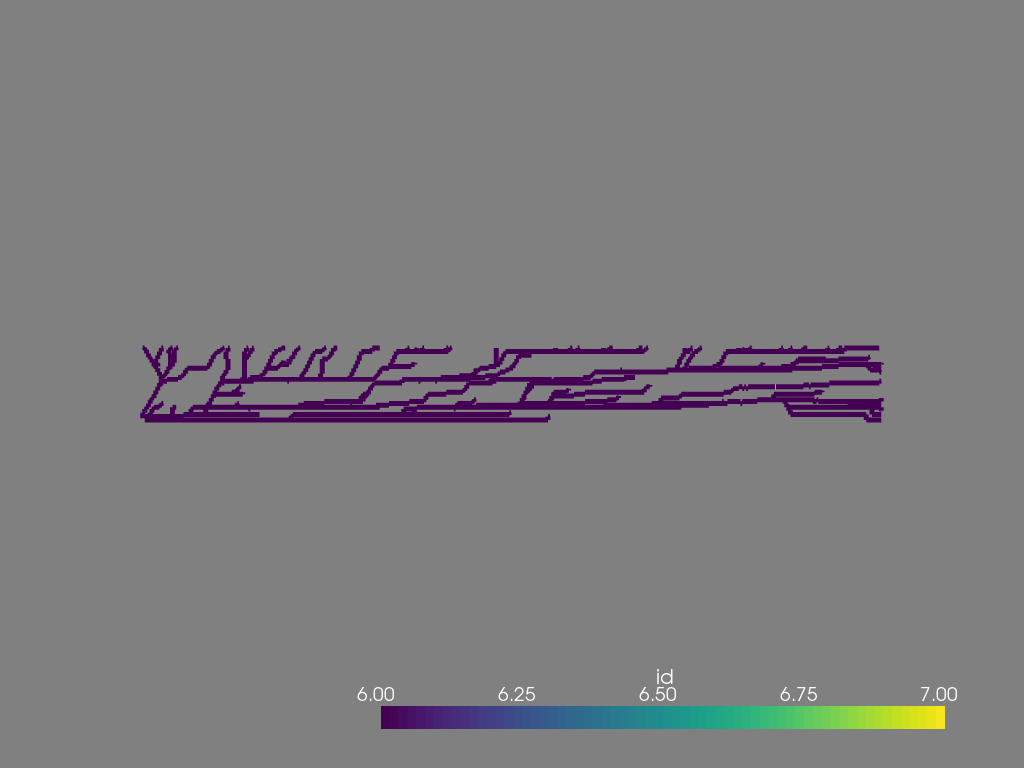

In [91]:
plotter = pv.Plotter()
cpos = (0.0,-10.0,0.0)
#cpos = (10.0,.0,0.0)
plotter.camera_set = True
plotter.set_background('grey')
plotter.add_mesh(karst_1d_cas2,opacity=1,smooth_shading=True,line_width=5)
plotter.show(use_panel=True,cpos=cpos)

In [20]:
karst_flow_cas2 = pv.read('output_2021/out_35bar_2021/out_0/save_karst/karst_flow_1d_200000000_cas_2.vtk')

In [21]:
karst_flow_cas2

UnstructuredGrid (0x7f7834351520)
  N Cells:	6136
  N Points:	6107
  X Bounds:	2.000e+00, 1.997e+03
  Y Bounds:	5.500e+01, 5.500e+01
  Z Bounds:	7.000e+00, 2.020e+02
  N Arrays:	4

In [25]:
karst_flow_cas2['Re[-]']

array([ 45.21330044, 140.76924622, 249.60729303, ..., 221.54766458,
       254.41628775, 282.43109917])

In [72]:
karst_flow_cas2 = karst_flow_cas2.cell_data_to_point_data()

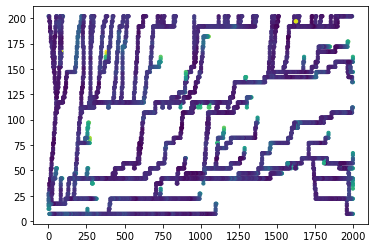

In [77]:
plt.scatter(karst_flow_cas2.points[:,0],karst_flow_cas2.points[:,2],10,karst_flow_cas2[keys[3]][:]);

DEPRECATED: please use `.set_active_scalars` instead.


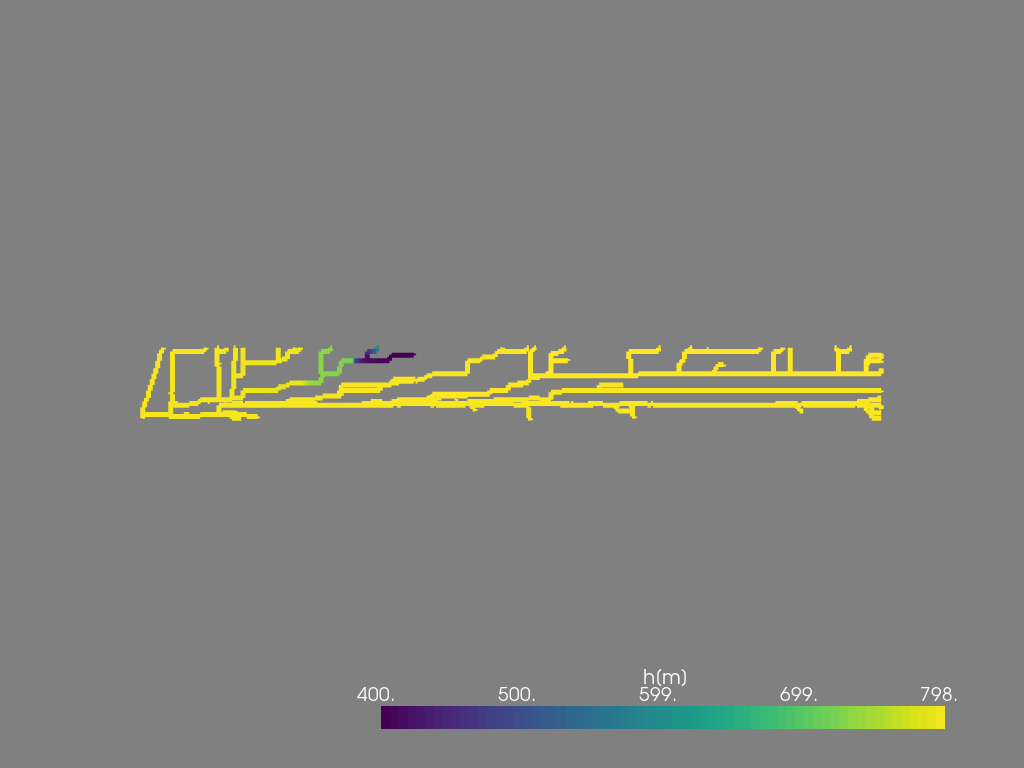

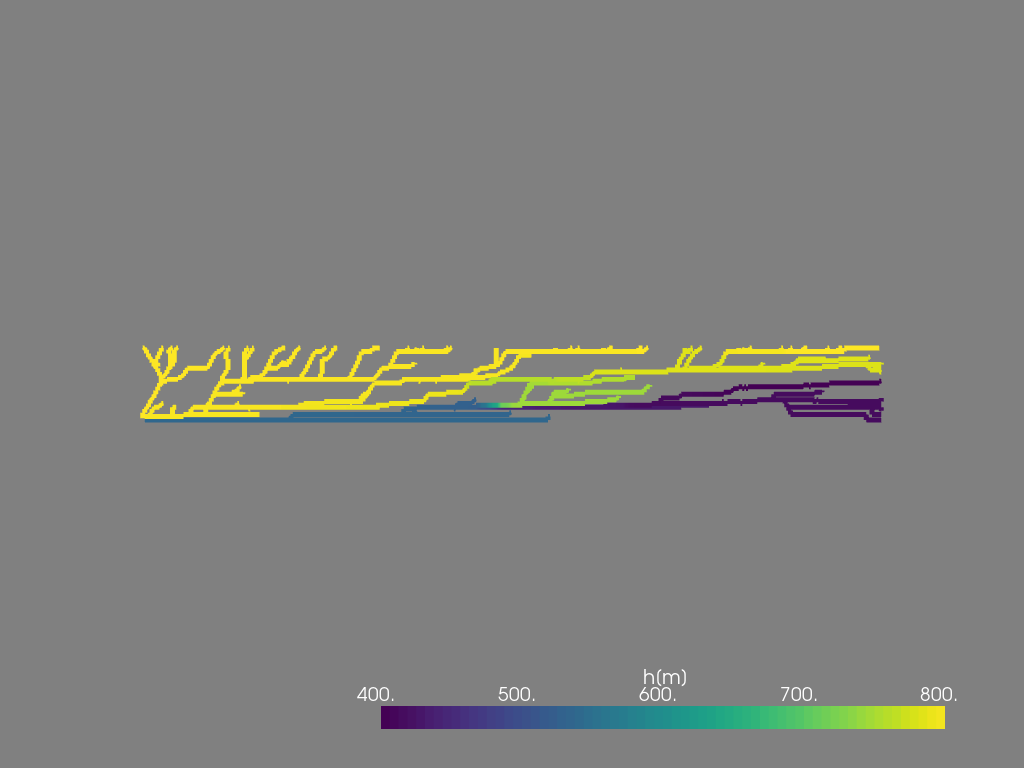

In [21]:
plotter = pv.Plotter()
cpos = (0.0,-10.0,0.0)
#cpos = (10.0,.0,0.0)
karst_flow_cas1.set_active_scalar(keys[0])
plotter.camera_set = True
plotter.set_background('grey')
plotter.add_mesh(karst_flow_cas1 ,opacity=1,smooth_shading=True,line_width=5)
plotter.show(use_panel=True,cpos=cpos)

plotter = pv.Plotter()
cpos = (0.0,-10.0,0.0)
#cpos = (10.0,.0,0.0)
karst_flow_cas2.set_active_scalar(keys[0])
plotter.camera_set = True
plotter.set_background('grey')
plotter.add_mesh(karst_flow_cas2 ,opacity=1,smooth_shading=True,line_width=5)
plotter.show(use_panel=True,cpos=cpos)

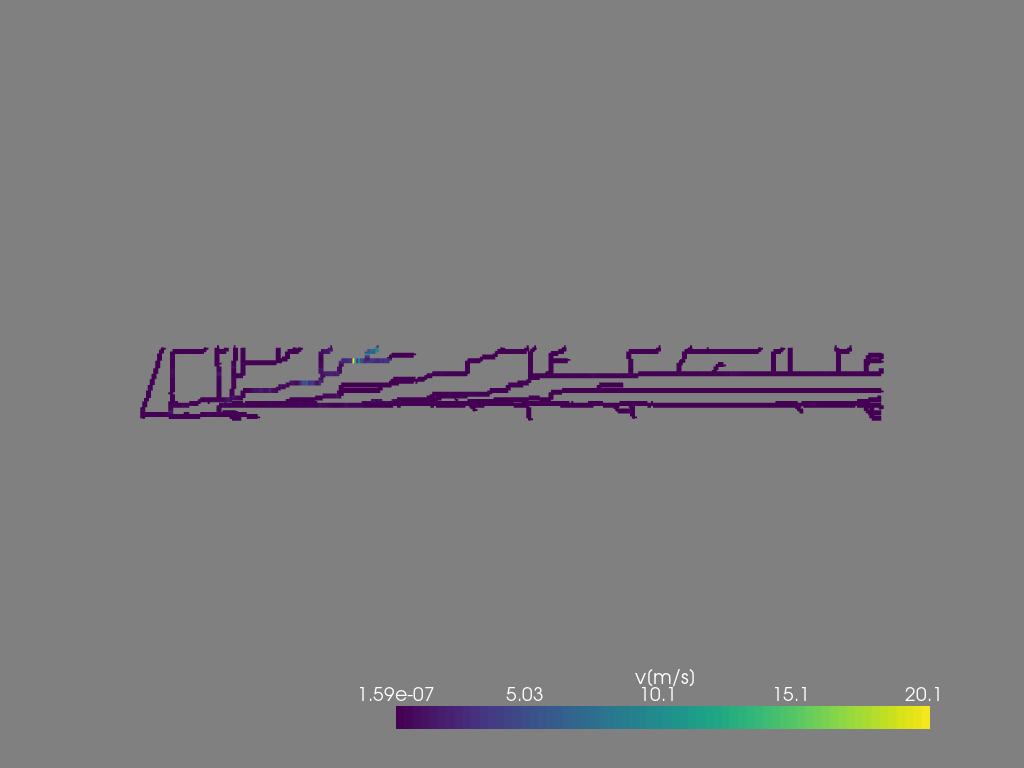

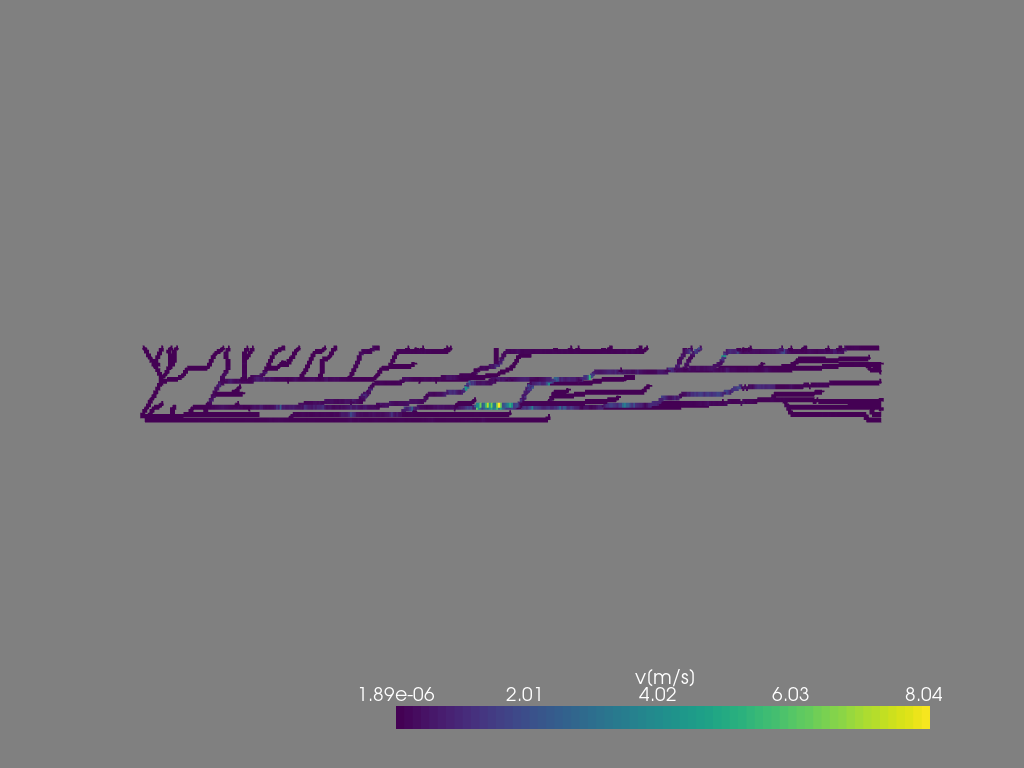

In [97]:
plotter = pv.Plotter()
cpos = (0.0,-10.0,0.0)
#cpos = (10.0,.0,0.0)
karst_flow_cas1.set_active_scalar(keys[1])
plotter.camera_set = True
plotter.set_background('grey')
plotter.add_mesh(karst_flow_cas1 ,opacity=1,smooth_shading=True,line_width=5)
plotter.show(use_panel=True,cpos=cpos)

plotter = pv.Plotter()
cpos = (0.0,-10.0,0.0)
#cpos = (10.0,.0,0.0)
karst_flow_cas2.set_active_scalar(keys[1])
plotter.camera_set = True
plotter.set_background('grey')
plotter.add_mesh(karst_flow_cas2 ,opacity=1,smooth_shading=True,line_width=5)
plotter.show(use_panel=True,cpos=cpos)

In [23]:
karst_flow_cas1[keys[2]] = np.log10(karst_flow_cas1[keys[2]])

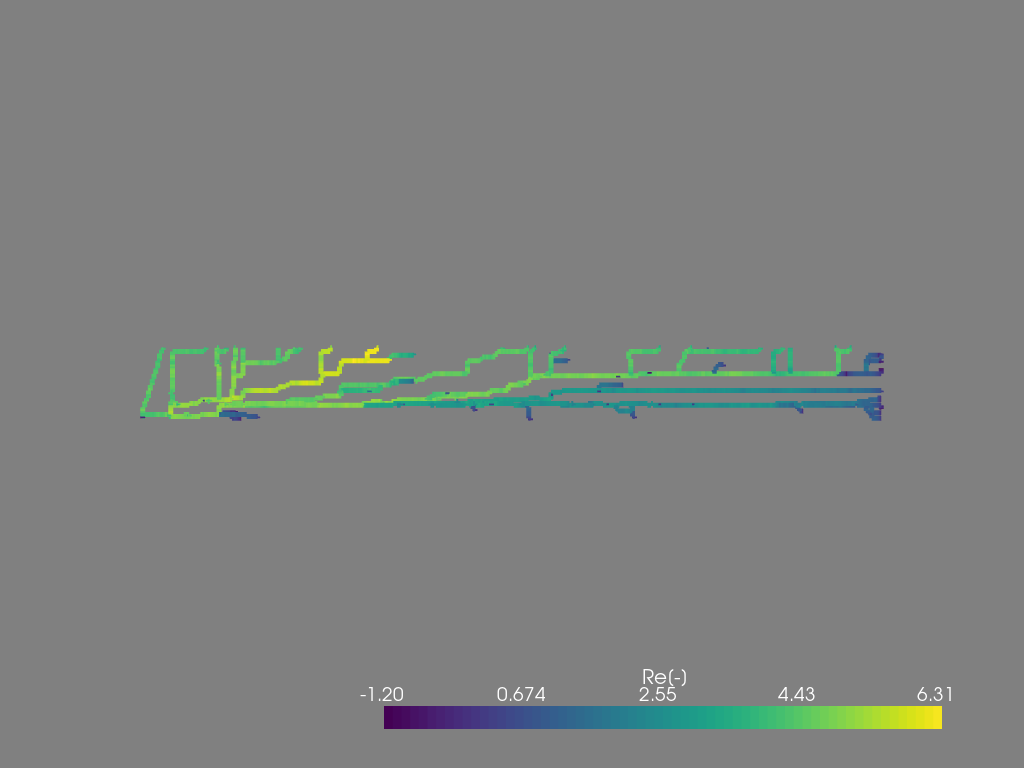

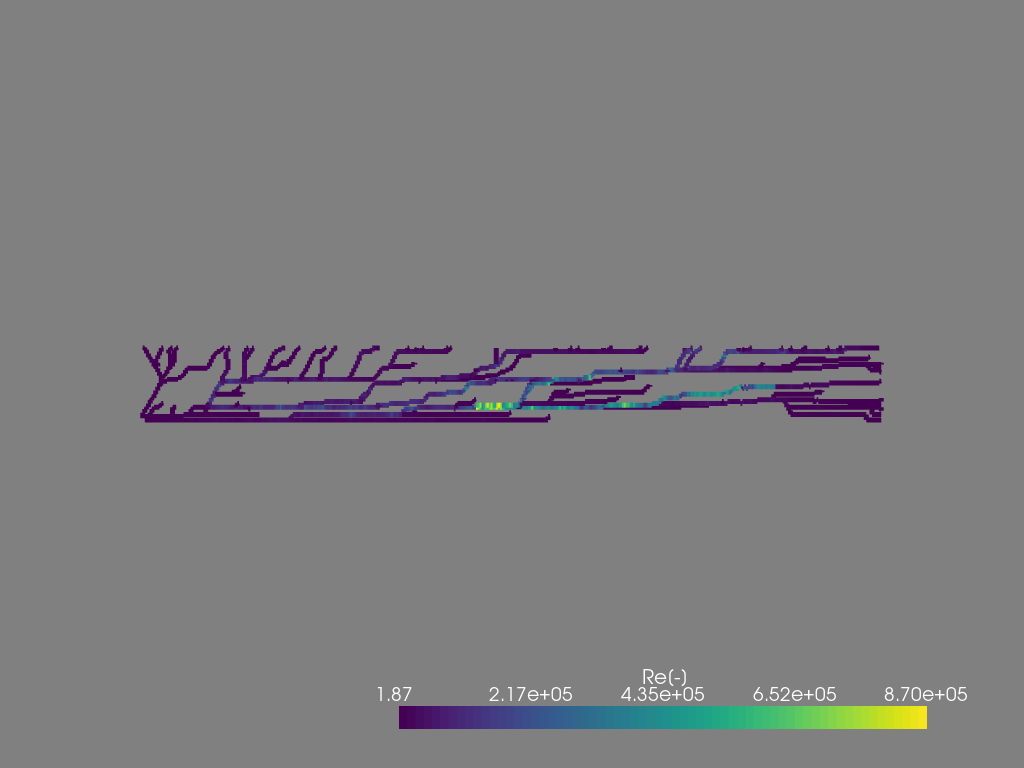

In [24]:
plotter = pv.Plotter()
cpos = (0.0,-10.0,0.0)
#cpos = (10.0,.0,0.0)
karst_flow_cas1.set_active_scalar(keys[2])
plotter.camera_set = True
plotter.set_background('grey')
plotter.add_mesh(karst_flow_cas1 ,opacity=1,smooth_shading=True,line_width=5)
plotter.show(use_panel=True,cpos=cpos)

plotter = pv.Plotter()
cpos = (0.0,-10.0,0.0)
#cpos = (10.0,.0,0.0)
karst_flow_cas2.set_active_scalar(keys[2])
plotter.camera_set = True
plotter.set_background('grey')
plotter.add_mesh(karst_flow_cas2 ,opacity=1,smooth_shading=True,line_width=5)
plotter.show(use_panel=True,cpos=cpos)

In [27]:
#karst_flow_cas1[keys[3]] = np.log10(karst_flow_cas1[keys[3]])
karst_flow_cas2[keys[3]] = np.log10(karst_flow_cas2[keys[3]])

In [30]:
karst_flow_cas2[keys[3]].shape

(6136,)

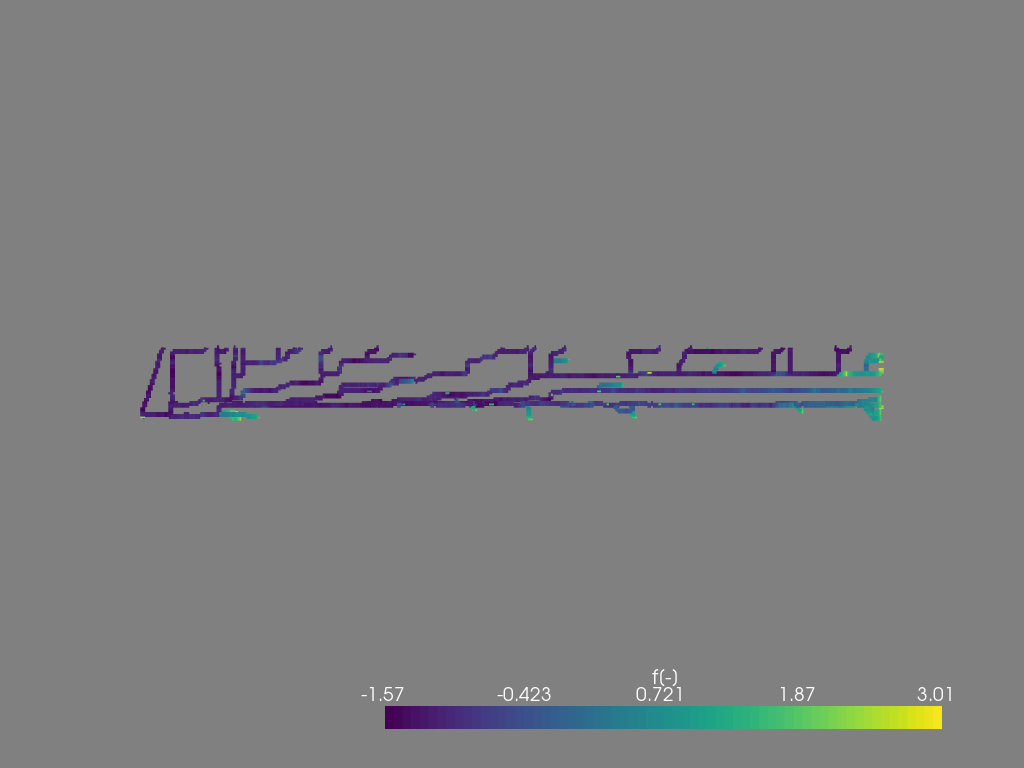

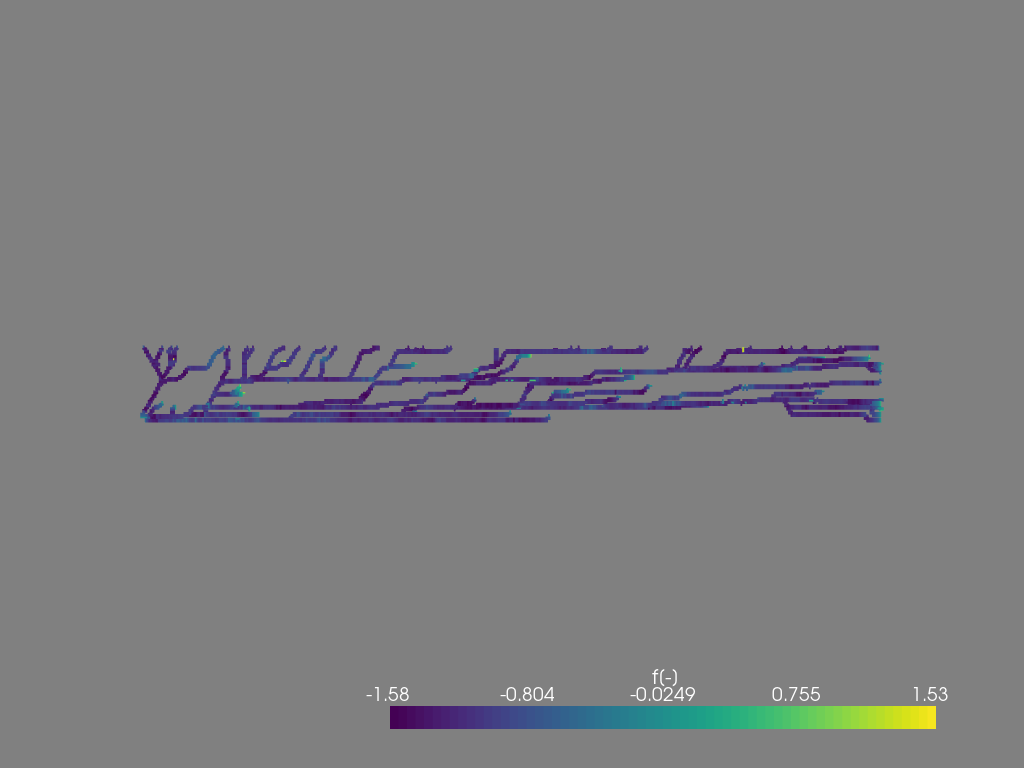

In [28]:
plotter = pv.Plotter()
cpos = (0.0,-10.0,0.0)
#cpos = (10.0,.0,0.0)
karst_flow_cas1.set_active_scalar(keys[3])
plotter.camera_set = True
plotter.set_background('grey')
plotter.add_mesh(karst_flow_cas1 ,opacity=1,smooth_shading=True,line_width=5)
plotter.show(use_panel=True,cpos=cpos)

plotter = pv.Plotter()
cpos = (0.0,-10.0,0.0)
#cpos = (10.0,.0,0.0)
karst_flow_cas2.set_active_scalar(keys[3])
plotter.camera_set = True
plotter.set_background('grey')
plotter.add_mesh(karst_flow_cas2 ,opacity=1,smooth_shading=True,line_width=5)
plotter.show(use_panel=True,cpos=cpos)

In [103]:
karst_out = karst_flow_cas2
for k in keys:
    v_max = karst_out[k].max()
    v_min = karst_out[k].min()
    v_mean = karst_out[k].mean()
    v_std  = karst_out[k].std()
    print('*********')
    print('The field {} has for maximum value {:0.3} and minimum value {:0.3}.'.format(k,v_max, v_min))
    print('The mean value is {:0.3} and the std corresponds to {:0.3}.'.format(v_mean, v_std))

*********
The field h[m] has for maximum value 8e+02 and minimum value 4e+02.
The mean value is 6.76e+02 and the std corresponds to 1.57e+02.
*********
The field v[m/s] has for maximum value 8.04 and minimum value 1.89e-06.
The mean value is 0.245 and the std corresponds to 0.608.
*********
The field Re[-] has for maximum value 8.7e+05 and minimum value 1.87.
The mean value is 6.26e+04 and the std corresponds to 1.17e+05.
*********
The field f[-] has for maximum value 34.2 and minimum value 0.0261.
The mean value is 0.135 and the std corresponds to 0.805.


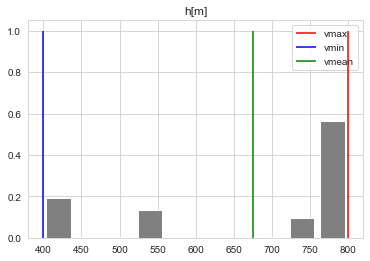

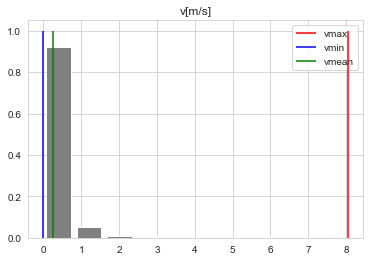

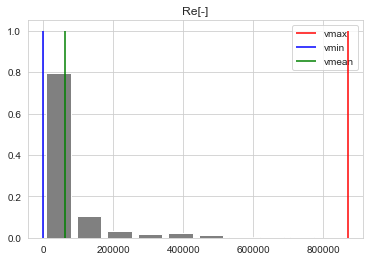

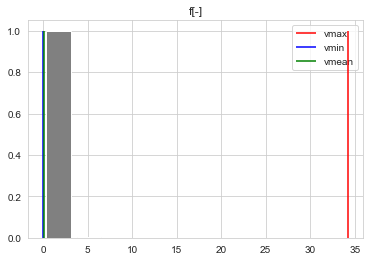

In [106]:
for i,k in enumerate(keys):
    plt.hist(karst_out[k],weights=np.ones(len(karst_out[k]))/len(karst_out[k]),zorder=9,rwidth=0.8,color='grey')
    v_max = karst_out[k].max()
    v_min = karst_out[k].min()
    v_mean = karst_out[k].mean()
    v_std  = karst_out[k].std()
    
    plt.vlines(v_max,0,1,label='vmax',color='red',zorder=10)
    plt.vlines(v_min,0,1,label='vmin',color='blue',zorder=10)
    plt.vlines(v_mean, 0,1, label='vmean',color='green',zorder=10)
    plt.legend()
    plt.grid(True)
    plt.title(k)
    plt.show()